**Output variable -> y**

**y -> Whether the client has subscribed a term deposit or not**

**Binomial ("yes" or "no")**


# 1. Import Necessary Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

# 2.Import Data

In [2]:
data=pd.read_csv(filepath_or_buffer='bank-full.csv',sep=";")
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
#Creating a copy not to affect the original dataset

In [4]:
data2=data.copy()
data2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# 3.Data Understanding

In [7]:
#'0' for No & '1' for yes (subscription)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data2['y']=le.fit_transform(data2['y'])
data2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


In [8]:
data2.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int64
dtype: object

### Let us consider the main labels

In [9]:
new_data=data2.drop(['default','balance','housing','loan','contact','day','month','duration','campaign','pdays','poutcome'],axis=1)
new_data

,age,job,marital,education,previous,y
0,58,management,married,tertiary,0,0
1,44,technician,single,secondary,0,0
2,33,entrepreneur,married,secondary,0,0
3,47,blue-collar,married,unknown,0,0
4,33,unknown,single,unknown,0,0
...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,1
45207,71,retired,divorced,primary,0,1
45208,72,retired,married,secondary,3,1
45209,57,blue-collar,married,secondary,0,0


In [10]:
new_data.rename({'y':'Subscribed'},axis=1,inplace=True)

In [11]:
new_data.dtypes

age            int64
job           object
marital       object
education     object
previous       int64
Subscribed     int64
dtype: object

In [12]:
new_data['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [13]:
new_data['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [14]:
new_data['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

# 4.Data Analysis

<AxesSubplot:xlabel='Subscribed', ylabel='count'>

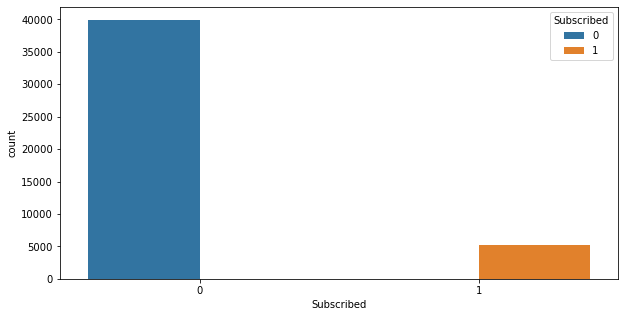

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(data=new_data ,x='Subscribed',hue="Subscribed")

In [16]:
new_data['Subscribed'].value_counts()

0    39922
1     5289
Name: Subscribed, dtype: int64

### Observation:
The one who are subscribed are very less compared to the one who are not

In [17]:
new_data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

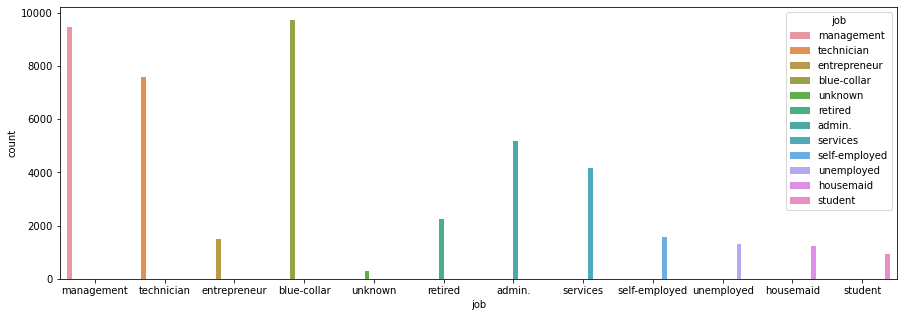

In [18]:
plt.figure(figsize=(15,5))
sns.countplot(x='job', y=None,data=new_data,hue='job')
plt.show()

<AxesSubplot:xlabel='job', ylabel='Subscribed'>

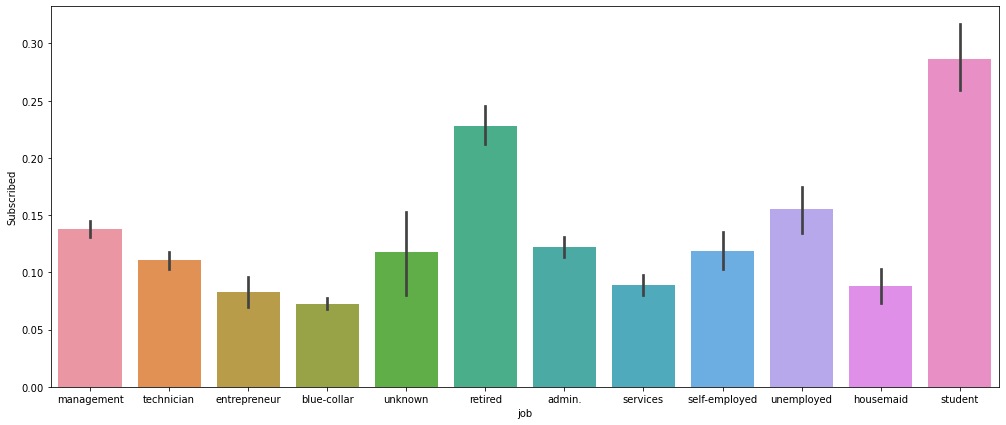

In [19]:
plt.figure(figsize=(17,7))
sns.barplot( x='job', y='Subscribed',data=new_data)

### Observation:
We can see that mostly students and retired has subscribed for term deposit

<AxesSubplot:xlabel='marital', ylabel='Subscribed'>

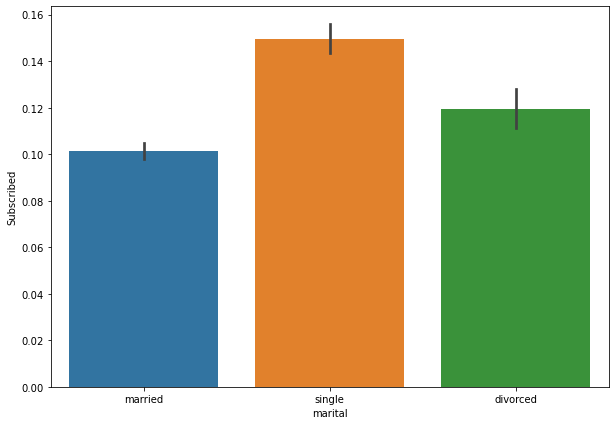

In [20]:
plt.figure(figsize=(10,7))
sns.barplot( x='marital', y='Subscribed',data=new_data)

### **Obsevation:**
single are subscribed the most 

<AxesSubplot:xlabel='age', ylabel='Density'>

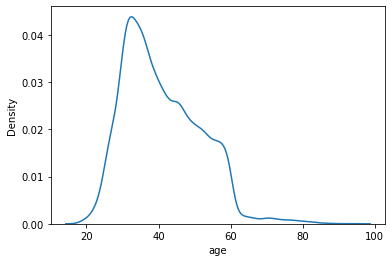

In [21]:
sns.distplot(a=new_data['age'],hist=False)

### Observation:
  We can see that the persons between the age 25 to 40 has subscribed the most

# 5. Data Preparation

In [22]:
new_data['job'] = np.where(new_data['job'].str.contains("yes"), 1, 0)

In [23]:
new_data['marital'] = np.where(new_data['marital'].str.contains("yes"), 1, 0)

In [24]:
new_data['education'] = np.where(new_data['education'].str.contains("yes"), 1, 0)

In [25]:
X=new_data.drop(labels='Subscribed',axis=1)
X

,age,job,marital,education,previous
0,58,0,0,0,0
1,44,0,0,0,0
2,33,0,0,0,0
3,47,0,0,0,0
4,33,0,0,0,0
...,...,...,...,...,...
45206,51,0,0,0,0
45207,71,0,0,0,0
45208,72,0,0,0,3
45209,57,0,0,0,0


In [26]:
y=new_data[['Subscribed']]
y

,Subscribed
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


# 6.Model Building & Model Training

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state=12,shuffle=True)

In [28]:
#splitted the data into trian & test parts and I have given test size=20% bcoz we should give more % to the training part of the data

In [29]:
X_train.shape , y_train.shape

((36168, 5), (36168, 1))

### Inference:
So we can see from 45211 observations for training part it has taken 80% i.e., 36168 observations

In [31]:
X_train

,age,job,marital,education,previous
24974,48,0,0,0,0
44761,65,0,0,0,1
14871,56,0,0,0,0
13592,29,0,0,0,0
8240,36,0,0,0,0
...,...,...,...,...,...
36482,29,0,0,0,0
40177,53,0,0,0,0
19709,32,0,0,0,0
38555,57,0,0,0,12


In [32]:
y_train

,Subscribed
24974,0
44761,0
14871,1
13592,0
8240,0
...,...
36482,0
40177,1
19709,0
38555,0


In [33]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)

LogisticRegression()

In [35]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [36]:
logistic_model.coef_

array([[0.0078943 , 0.        , 0.        , 0.        , 0.11106815]])

In [32]:
logistic_model.intercept_

array([-2.42511489])

# 7. Model Predictions

In [37]:
y_pred_train = dt_model.predict(X_train)

In [42]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_train,y_pred_train))

0.8879396151293961


In [39]:
print('Classification Report:\n',classification_report(y_train,y_pred_train))

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     31929
           1       0.79      0.06      0.11      4239

    accuracy                           0.89     36168
   macro avg       0.84      0.53      0.53     36168
weighted avg       0.88      0.89      0.84     36168



In [40]:
print('Confusion Matrix:\n',confusion_matrix(y_train,y_pred_train))

Confusion Matrix:
 [[31861    68]
 [ 3985   254]]


In [41]:
(31861+254)/(31861+68+3985+254)*100

88.79396151293962

# Inference:
**Therefore 88.79% is the accuracy of this model**

## ROC curve
we will have false positive Rate,True positive Rate and threshold values to get the area under the curve

0.5288950335378986


Text(0, 0.5, 'True Positive Rate')

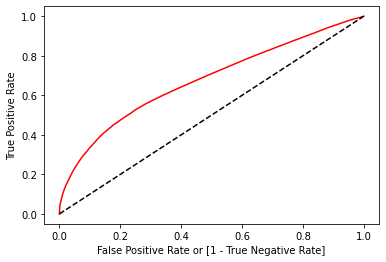

In [45]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, thresholds = roc_curve(y, dt_model.predict_proba (X)[:,1])

auc = roc_auc_score(y_train,y_pred_train)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [46]:
#Area under the curve
auc

0.5288950335378986

In [47]:
y_pred_test = logistic_model.predict(X_test)

In [48]:
accuracy_score(y_test,y_pred_test)

0.8824505142098861

### It is used to understand the relationship between the dependent variable and one or more independent variables by estimating probabilities 